In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("data/final_data.csv")

In [5]:
df.shape

(307507, 798)

In [87]:
df['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
356246     412560.0
356247     622413.0
356248     315000.0
356249     450000.0
356250     312768.0
Name: AMT_CREDIT, Length: 356251, dtype: float64

In [88]:
df['TARGET'].notna()

0          True
1          True
2          True
3          True
4          True
          ...  
356246    False
356247    False
356248    False
356249    False
356250    False
Name: TARGET, Length: 356251, dtype: bool

In [53]:
filing = {}
nb_rows = df.shape[0]
for col in list(df.columns):
    filing[col] = df[col].notna().sum()
    #filing.append((col, df[col].notna().sum()))

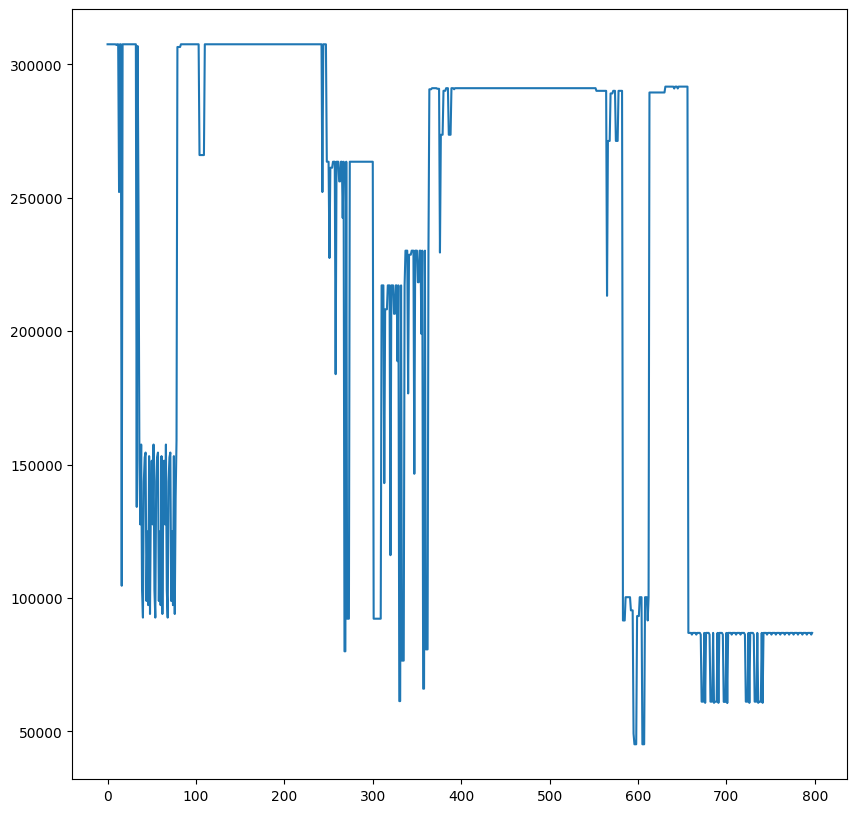

In [54]:
fig = plt.figure(figsize=(10,10))
plt.plot([f for f in filing.values()])

In [55]:
to_del = []
for col, fil in filing.items():
    if fil / nb_rows < 0.8:
        to_del.append(col)

In [56]:
df.drop(columns=to_del, inplace=True)

In [57]:
df.shape

(307507, 509)

In [58]:
del filing, to_del

In [59]:
df.replace(np.inf, np.nan, inplace=True)
df.replace(-np.inf, np.nan, inplace=True)


In [60]:
df.isnull().sum().sum()

6992467

In [61]:
for col in df.columns:
    df[col].replace(np.nan, df[col].median(), inplace=True)

In [62]:
df.isnull().sum().sum()

0

# Features selection
Le but de cette partie va être de réduire le nombre de colonnes de notre dataframe en ne gardant que les variables qui ont une réelle importance.  
Plusieurs méthodes vont être explorées.  Seules les variable désignées par au moins trois de ces méthodes seront conservées à la fin.

In [63]:
X = df.drop(columns='TARGET')
features_name = X.columns.tolist()
y = df['TARGET']

## Filter
### Corrélation de Pearson
On mesure la corrélation entre la variable cible "TARGET" et chaque variable de la bdd

In [64]:
cor_list = []

for i in X.columns.tolist():
    cor_list.append(np.corrcoef(X[i], y)[0, 1])
cor_list = [0 if np.isnan(i) else i for i in cor_list]


C:\Users\matth\miniconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matth\miniconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [65]:
indices = np.argsort(np.abs(cor_list))[-101:] # argsort return the element's indices of the sorted list

In [66]:
cor_feat = X.iloc[:,indices].columns.tolist()
cor_support = [True if i in cor_feat else False for i in features_name]

### CHI 2

In [67]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [68]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)

SelectKBest(k=100, score_func=<function chi2 at 0x0000025D1744B160>)

## Wrapper

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [70]:
rfe_selector = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=100, step=50, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 508 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 458 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 408 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 358 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 308 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 258 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 208 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 158 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 108 features.


C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=100,
    step=50, verbose=5)

## Embeded
### LogisticRegression

In [71]:
from sklearn.feature_selection import SelectFromModel

In [72]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty='l2'), threshold='1.25*median')
embeded_lr_selector.fit_transform(X_norm, y)

C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.        , 0.        , 0.        , ..., 0.89816784, 0.9900531 ,
        0.04851752],
       [1.        , 0.        , 0.        , ..., 0.54943937, 0.94251775,
        0.06469003],
       [0.        , 1.        , 0.        , ..., 0.75271621, 0.99620746,
        0.00539084],
       ...,
       [1.        , 0.        , 0.        , ..., 0.22280685, 0.94452439,
        0.03504043],
       [1.        , 0.        , 0.        , ..., 0.94841488, 0.99491451,
        0.04851752],
       [1.        , 0.        , 0.        , ..., 0.84712728, 0.94202646,
        0.1967655 ]])

### Random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='125*median')
embeded_rf_selector.fit(X_norm, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold='125*median')

### LightGBM

In [75]:
from lightgbm import LGBMClassifier
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [76]:
lgbc = LGBMClassifier(n_estimators=500,
                      learning_rate=0.05,
                      num_leaves=32,
                      colsample_bytree=0.2,
                      reg_alpha=3,
                      reg_lambda=1,
                      min_split_gain=0.1,
                      min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, threshold="1.25*median")
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.1, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

## Résultat 

In [77]:

features_df = pd.DataFrame({'Feature': features_name,
                            'Pearson': cor_support,
                            'Chi-2' : chi_selector.get_support(),
                            'Wrapper': rfe_selector.get_support(),
                            'LogReg' : embeded_lr_selector.get_support(),
                            'Random Forest' : embeded_rf_selector.get_support(),
                            'LightGBM': embeded_lgb_selector.get_support()})

In [78]:
df.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY',
       ...
       'INSTAL_AMT_INSTALMENT_MEAN', 'INSTAL_AMT_INSTALMENT_SUM',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_SUM',
       'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'INSTAL_COUNT'],
      dtype='object', length=509)

In [79]:
features_df['Total'] = np.sum(features_df, axis=1)
features_selection = features_df.sort_values('Total', ascending=False).reset_index().drop(columns='index')
features_selection

C:\Users\matth\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi-2,Wrapper,LogReg,Random Forest,LightGBM,Total
0,EXT_SOURCE_3,True,True,True,True,False,True,5
1,BURO_CREDIT_TYPE_Credit card_MEAN,True,True,True,True,False,True,5
2,EXT_SOURCE_2,True,True,True,True,False,True,5
3,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,True,True,True,True,False,True,5
4,PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN,True,True,True,True,False,True,5
...,...,...,...,...,...,...,...,...
503,NAME_HOUSING_TYPE_Municipal apartment,False,False,False,False,False,False,0
504,PREV_NAME_PORTFOLIO_nan_MEAN,False,False,False,False,False,False,0
505,BURO_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN,False,False,False,False,False,False,0
506,BURO_CREDIT_CURRENCY_nan_MEAN,False,False,False,False,False,False,0


In [80]:
features_df.shape

(508, 8)

In [81]:
selected_features = features_selection.loc[features_selection['Total'] >= 3]['Feature']
to_add = pd.Series({'Feature': ['SK_ID_CURR', 'TARGET']})
selected_features

0                                         EXT_SOURCE_3
1                    BURO_CREDIT_TYPE_Credit card_MEAN
2                                         EXT_SOURCE_2
3       PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN
4      PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN
                            ...                       
128                                        AMT_ANNUITY
129                                         AMT_CREDIT
130                         NAME_FAMILY_STATUS_Married
131                                       FLAG_OWN_CAR
132                                    FLAG_DOCUMENT_6
Name: Feature, Length: 133, dtype: object

In [82]:
selected_features.loc[132] = 'SK_ID_CURR'
selected_features.loc[133] = 'TARGET'

C:\Users\matth\AppData\Local\Temp\ipykernel_22788\2715212856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.loc[132] = 'SK_ID_CURR'
C:\Users\matth\AppData\Local\Temp\ipykernel_22788\2715212856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.loc[133] = 'TARGET'


In [83]:
selected_features

0                                         EXT_SOURCE_3
1                    BURO_CREDIT_TYPE_Credit card_MEAN
2                                         EXT_SOURCE_2
3       PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN
4      PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN
                            ...                       
129                                         AMT_CREDIT
130                         NAME_FAMILY_STATUS_Married
131                                       FLAG_OWN_CAR
132                                         SK_ID_CURR
133                                             TARGET
Name: Feature, Length: 134, dtype: object

In [84]:
df.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY',
       ...
       'INSTAL_AMT_INSTALMENT_MEAN', 'INSTAL_AMT_INSTALMENT_SUM',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_SUM',
       'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
       'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'INSTAL_COUNT'],
      dtype='object', length=509)

In [85]:
new_df = df.loc[:, selected_features]
#new_df.set_index('SK_ID_CURR', inplace=True)

In [86]:
new_df.head()

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Credit card_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolving loans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Higher education,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR,SK_ID_CURR,TARGET
0,0.139376,0.5,0.262949,0.000000,0.000000,0.0,0.000000,0.0,1,9251.775,...,1,0,-3648.0,0,24700.5,406597.5,0,0,100002,1
1,0.535276,0.5,0.622246,0.333333,0.000000,0.0,0.100061,0.0,1,56553.990,...,0,0,-1186.0,1,35698.5,1293502.5,1,0,100003,0
2,0.729567,0.0,0.555912,0.000000,0.000000,0.0,0.212008,0.0,0,5357.250,...,1,1,-4260.0,0,6750.0,135000.0,0,1,100004,0
3,0.535276,0.2,0.650442,0.222222,0.000000,0.0,0.217830,0.0,1,21842.190,...,1,0,-9833.0,0,29686.5,312682.5,0,0,100006,0
4,0.535276,0.0,0.322738,0.000000,0.166667,0.0,0.218890,0.0,0,12278.805,...,0,0,-4311.0,0,21865.5,513000.0,0,0,100007,0


In [87]:
new_df.to_csv("utils_features.csv", index=False)

## Séparation des données

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re

In [16]:
new_df = pd.read_csv("utils_features.csv")
new_df = new_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [17]:
new_df.set_index('SK_ID_CURR', inplace=True)
new_df.head()

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.5,0.262949,0.000000,0.000000,0.0,0.000000,0.0,1,9251.775,...,1,1,0,-3648.0,0,24700.5,406597.5,0,0,1
100003,0.535276,0.5,0.622246,0.333333,0.000000,0.0,0.100061,0.0,1,56553.990,...,1,0,0,-1186.0,1,35698.5,1293502.5,1,0,0
100004,0.729567,0.0,0.555912,0.000000,0.000000,0.0,0.212008,0.0,0,5357.250,...,1,1,1,-4260.0,0,6750.0,135000.0,0,1,0
100006,0.535276,0.2,0.650442,0.222222,0.000000,0.0,0.217830,0.0,1,21842.190,...,1,1,0,-9833.0,0,29686.5,312682.5,0,0,0
100007,0.535276,0.0,0.322738,0.000000,0.166667,0.0,0.218890,0.0,0,12278.805,...,1,0,0,-4311.0,0,21865.5,513000.0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X = new_df.drop(columns='TARGET')
y = new_df['TARGET']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

## Équilibrage des classes

In [21]:
y_train.value_counts()

0    197919
1     17335
Name: TARGET, dtype: int64

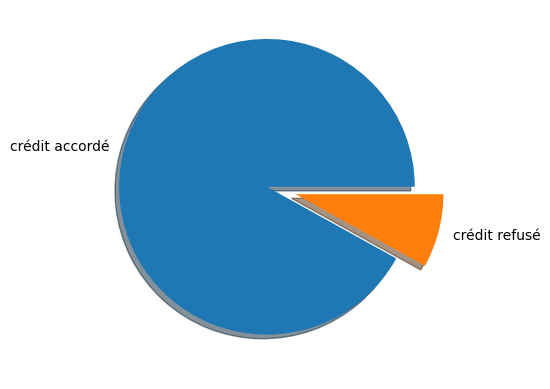

In [22]:
myexplode = [0.2, 0]

plt.pie(y_train.value_counts(), labels=['crédit accordé', "crédit refusé"], explode=myexplode, shadow=True)
plt.savefig("classe équilibrées.png")
plt.show()

On peut voir sur ce graphique que la distribution de nos deux classes, à savoir crédit accordé ou refusé, n'est pas du tout equitable. Cela représente un risque pour nos futurs modèles qui n'auront pas assez de données pour décider de la bonne classe correspondante à un dossier.
Il faut donc appliquer un traitement sur nos classes pour pouvoir arriver à une distribution équitable.  
### Librairie SMOTE

L'over sampling consiste à rajouter des lignes de la classe minoritaire.  
L'undersampling consiste à enlever des lignes de la classe majoritaire.  
La librairie SMOTE fait de l'oversampling en créant de nouvelles ligne plus élaborées que de simples copies. Elle va regarder la position des lignes de la classe minoritaire dans le nuage de point de dimension égale au nombre de variables. Ensuite, elle va créer de nouveaux points à proximité de ceux de la classe minoritaire.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [25]:
from collections import Counter
counter_before = Counter(y_train)
counter_after = Counter(y_train_over)
print(counter_before, counter_after)

Counter({0: 197919, 1: 17335}) Counter({0: 197919, 1: 197919})


#### NOTE :
Dans la cellule précédente je n'ai utilisé que l'oversampling.  Or il semblerait qu'il soit plus indiqué de faire de l'oversampling avec de l'undersampling pour plus de performance des modèles entrainés.  
paragraphe exemple :  
We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).  

Faut-il faire comme indiqué? Ou faire les deux pour comparer les performances des modèles issus des deux méthodes?

## Récupération des modèles entrainés
Les modèles mettant beaucoup de temps à s'entrainer, une fois cette entrainement accomplis ils ont été sauvegardé sur avec mlflows. L'entrainement de ces modèles est accessible dans le notebook "...".  
### Regression logistique

## Entrainement des modèles
### Réduction des données
En l'état les données sont trop volumineuses pour pouvoir entrainer les modèles. Nous pouvons les réduire en utilisant la méthode sample() d'un dataframe pandas.

In [26]:
to_sample = X_train_over.merge(y_train_over, left_index=True, right_index=True)

In [27]:
to_sample = to_sample.sample(frac=0.2)

In [28]:
X_train = to_sample.drop(columns='TARGET')
y_train = to_sample['TARGET']

In [3]:
import mlflow

In [4]:
from sklearn.linear_model import LogisticRegression
import time

In [27]:
mlflow.set_tracking_uri("http://localhost:5000")

In [28]:
logged_reg = 'runs:/b5b2b08547fa4876aaa83caebcf20ba9/log_reg'
log_reg = mlflow.pyfunc.load_model(logged_reg)

MlflowException: API request to http://localhost:5000/api/2.0/mlflow/runs/get failed with exception HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/get?run_uuid=b5b2b08547fa4876aaa83caebcf20ba9&run_id=b5b2b08547fa4876aaa83caebcf20ba9 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000263D60929D0>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [79]:
log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [80]:
cm = confusion_matrix(y_test, log_reg.predict(X_test))

<AxesSubplot: >

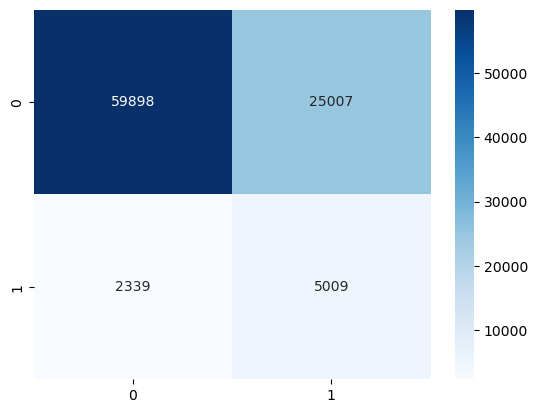

In [81]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')

In [18]:
def cout_custom(y_test, y_pred):  
    VN, FP, FN, VP = confusion_matrix(y_test, y_pred).ravel()
    return 10*FN + 1*FP

In [19]:
from sklearn.metrics import make_scorer, get_scorer_names # à importer de scikit learn
score_bancaire = make_scorer(cout_custom, greater_is_better=False)

In [48]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
random_seed = 42
kfolds = KFold(n_splits=5, shuffle=True, random_state=random_seed)

In [22]:
def tune(objective, study_name):
    study = optuna.create_study(study_name=study_name, direction='minimize')
    
    study.optimize(objective, n_trials=10)
    
    params = study.best_params
    best_score = study.best_value
    return params, best_score

In [23]:
def log_reg_objective(trial):
    _C = trial.suggest_float('C', 0.01, 100)
    
    clf_log = LogisticRegression(C=_C, random_state=random_seed)
    
    score = cross_val_score(clf_log, X_train, y_train, cv=kfolds, scoring=score_bancaire).mean()
    return score

In [88]:
mlflow.set_experiment('optimisation cout metier')

<Experiment: artifact_location='mlflow-artifacts:/483941439685672068', creation_time=1672242412309, experiment_id='483941439685672068', last_update_time=1672242412309, lifecycle_stage='active', name='optimisation cout metier', tags={}>

[I 2023-01-11 12:51:58,899] A new study created in memory with name: log reg metier
C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

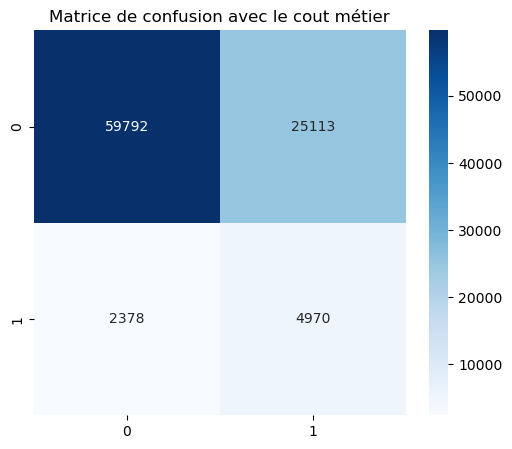

In [134]:
with mlflow.start_run(run_name="Logistic regression metier"):
    params = {}
    params['MODEL_NAME'] = 'logistic_regression metier'
    params['TRAIN_SIZE'] = len(X_train)
    
    start = time.time()
    log_params, log_score = tune(log_reg_objective, 'log reg metier')
    params['time'] = time.time() - start
    
    params['C'] = log_params['C']
    cout_metier_train = log_score
    mlflow.log_metric('cout metier train', -cout_metier_train)
    # mlflow.log_metric('train_roc_auc', train_roc_auc) # le nom de la metric est imposé par mlflow, ici rien ne va être log  
    
    
    # On entraine le modèle avec les paramètres retournés
    clf_log = LogisticRegression(C=params['C'])
    clf_log.fit(X_train, y_train)
    
    
    # On calcul le score final du modele avec les données de test
    y_pred = clf_log.predict(X_test)
    pd.DataFrame(y_pred).to_csv('y_pred.csv')
    cout_metier_test = cout_custom(y_test, y_pred)
    mlflow.log_metric('cout metier test', cout_metier_test)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    cm = sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    plt.title('Matrice de confusion avec le cout métier')
    plt.savefig("confusion_matrix_metier.png")
#    client = mlflow.tracking.MlflowClient()

    mlflow.log_artifact(local_path="confusion_matrix_metier.png")
    
    mlflow.log_params(params)
    # On sauvegarde le model pour l'utiliser dans le futur sans avoir à l'entrainer de nouveau
    mlflow.sklearn.log_model(clf_log, 'log_reg_metier')

Comparaison entre l'entrainement cout metier et l'entrainement purement statistique

In [42]:
logged_reg_stat = 'runs:/c36be2ec3ef146f5bcbc80d4a996a209/log_reg'
log_reg_stat = mlflow.pyfunc.load_model(logged_reg_stat)
cm_stat = mlflow.artifacts.load_image(artifact_uri="file:///C:/Users/matth/Documents/openclassroom/data_scientist/P7/mlruns/747928904526590890/c36be2ec3ef146f5bcbc80d4a996a209/artifacts/confusion_matrix_hors_metier.png")


2023/03/01 16:30:08 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - cloudpickle (current: 2.0.0, required: cloudpickle==2.2.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [51]:
log_reg_stat._model_impl.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [53]:
y_pred_stat = log_reg_stat._model_impl.predict(X_test)
auc_roc = roc_auc_score(y_true=y_test, y_score=y_pred_stat)
print(auc_roc)

0.691506433385842


In [72]:
np.array(X_test)

array([[ 0.84093533,  1.11536635,  1.07652893, ...,  1.27796446,
         0.75198854,  1.39293184],
       [ 0.45645643, -0.98098878, -0.98166654, ...,  0.72004274,
        -1.3298075 , -0.71791022],
       [ 1.05581068, -0.98098878,  0.07988617, ..., -0.07510361,
         0.75198854,  1.39293184],
       ...,
       [ 0.11204776, -0.14244673, -1.6372586 , ..., -0.45970757,
         0.75198854, -0.71791022],
       [ 1.27234404, -0.98098878,  0.26785726, ...,  0.3879864 ,
         0.75198854, -0.71791022],
       [-1.99325239, -0.98098878,  0.7443509 , ..., -0.34980475,
        -1.3298075 ,  1.39293184]])

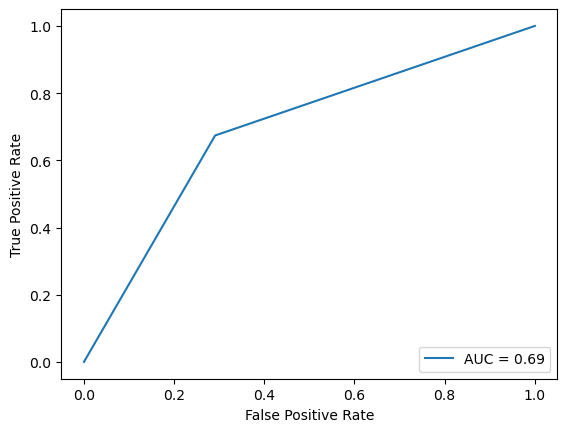

In [77]:
from sklearn import metrics
fpr, tpr, tresholds = metrics.roc_curve(y_test, y_pred_stat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [26]:
X_train.iloc[:100].to_csv("X_train.csv", index=False)
y_train.iloc[:100].to_csv("y_train.csv", index=False)
X_test.iloc[:100].to_csv('X_test.csv', index=False)
y_test.iloc[:100].to_csv('y_test.csv', index=False)

In [67]:
import pickle

pickle_in = open("loan_risk_model.pkl", 'rb')
model = pickle.load(pickle_in)
y_pred = pd.DataFrame(model.predict(X_test))
y_pred.iloc[:100].to_csv("y_pred.csv")

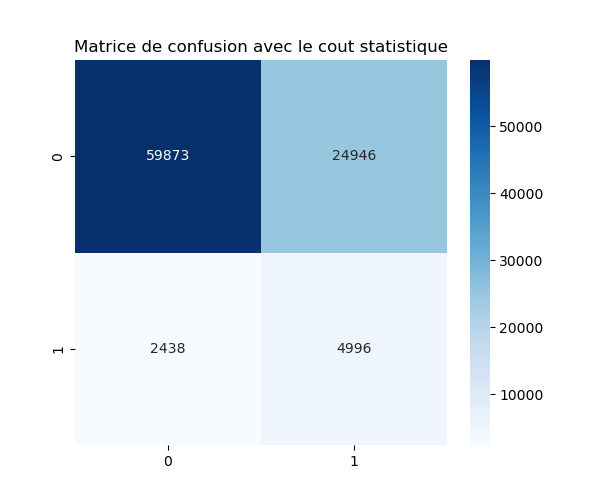

In [137]:
cm_stat

In [35]:
mlflow.set_tracking_uri("http://localhost:5000")
logged_reg_metier = 'runs:/e0165fc14d104761884480245d5bfd00/log_reg_metier'


In [36]:
# il faut avoir le mlflow ui de lancé pour que cette commande fonctionne
log_reg_metier = mlflow.pyfunc.load_model(logged_reg_metier)

2023/03/01 15:50:36 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - cloudpickle (current: 2.0.0, required: cloudpickle==2.2.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


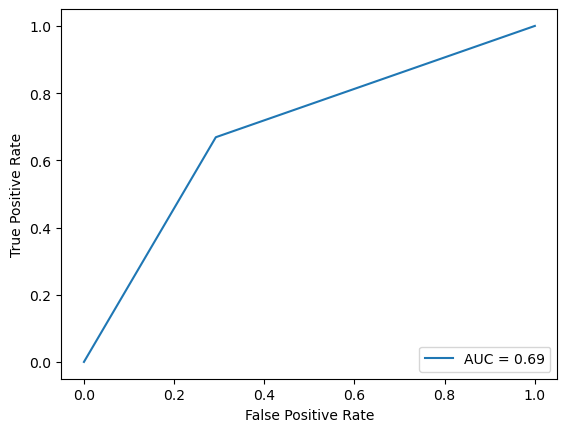

In [78]:
y_pred_metier = log_reg_metier._model_impl.predict(X_test)
fpr, tpr, tresholds = metrics.roc_curve(y_test, y_pred_metier)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [37]:
log_reg_metier.__dict__

{'_model_meta': <mlflow.models.model.Model at 0x1e3bed285b0>,
 '_model_impl': LogisticRegression(C=36.896172428492385),
 '_predict_fn': <bound method LinearClassifierMixin.predict of LogisticRegression(C=36.896172428492385)>}

In [40]:
log_reg_metier._model_meta.__dict__

{'run_id': 'e0165fc14d104761884480245d5bfd00',
 'artifact_path': 'log_reg_metier',
 'utc_time_created': '2023-01-11 11:52:48.898660',
 'flavors': {'python_function': {'env': {'conda': 'conda.yaml',
    'virtualenv': 'python_env.yaml'},
   'loader_module': 'mlflow.sklearn',
   'model_path': 'model.pkl',
   'predict_fn': 'predict',
   'python_version': '3.9.12'},
  'sklearn': {'code': None,
   'pickled_model': 'model.pkl',
   'serialization_format': 'cloudpickle',
   'sklearn_version': '1.2.0'}},
 '_signature': None,
 '_saved_input_example_info': None,
 'model_uuid': '806c212505294d59a6cd36889993722f',
 'mlflow_version': '2.0.1'}

In [55]:
def new_predict(y,s):
    if y > s:
        return 0
    else:
        return 1

In [57]:
cout = []
seuil = []
for s in np.arange(0.01, 1.0, 0.01):
    seuil.append(s)
    proba_pred = log_reg_metier._model_impl.predict_proba(X_test)
    y_pred =  []
    for y in proba_pred:
        y_pred.append(new_predict(y[0], s))
    cout.append(cout_custom(y_test, y_pred))
# on va faire une fois le calcul de y_proba avec le modèle entrainée avec le cout métier
# pour chaque valeur de seuil les predicts on calcul le cout et on sauvegarde la valeur dans une liste
# on affiche la courbe du coup en fonction des valeurs de seuil
# le minimum de la courbe est le seuil optimal

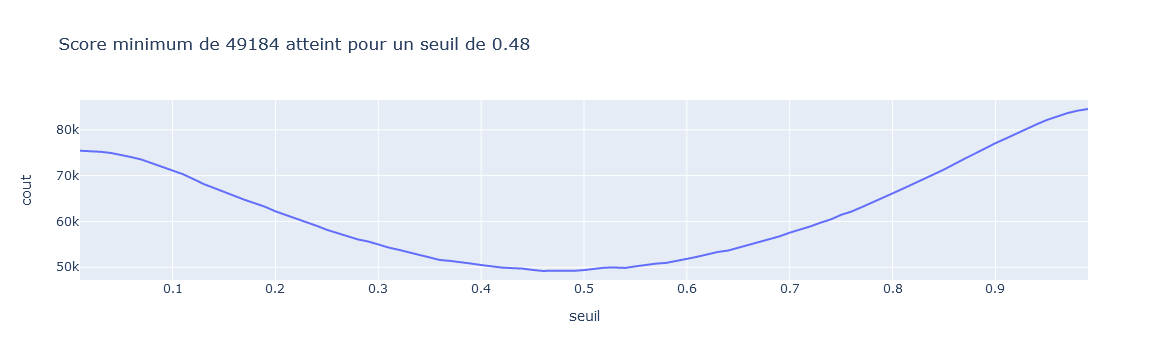

In [61]:
import plotly.express as px
min_score = min(cout)
best_seuil = seuil[cout.index(min_score)]
px.line(pd.DataFrame({"seuil" : seuil, "cout": cout}), x="seuil", y="cout", title=f"Score minimum de {min_score} atteint pour un seuil de {np.round(best_seuil,3)}")

On peut voir que le minimum de notre coût métier n'est pas atteint pour un seuil de 0,5 mais de 0.48. Un peu contre intuitif. On pourrait penser que baisser le seuil augmente le risque d'accorder un crédit à une personne non solvable. ON peut interpréter ce résultat en disant que les non solvables restent non solvable avec cette valeur légèrement inférieur mais que le nombre de faux positif, les personnes solvables estimées non solvables, dimunue.

In [76]:
cm_metier = mlflow.artifacts.load_image(artifact_uri="mlflow-artifacts:/483941439685672068/e0165fc14d104761884480245d5bfd00/artifacts/confusion_matrix_metier.png")

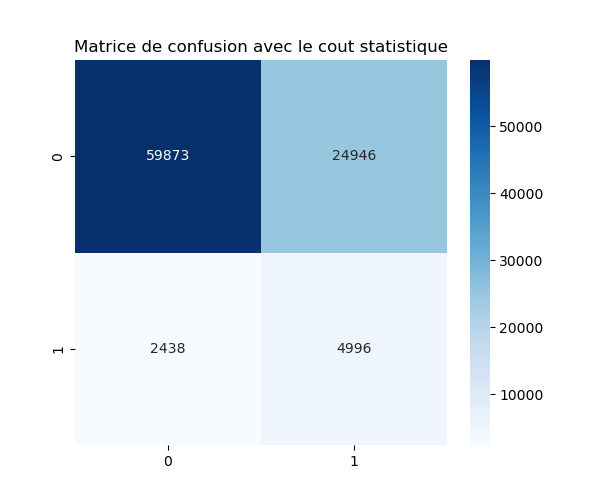

In [144]:
cm_stat

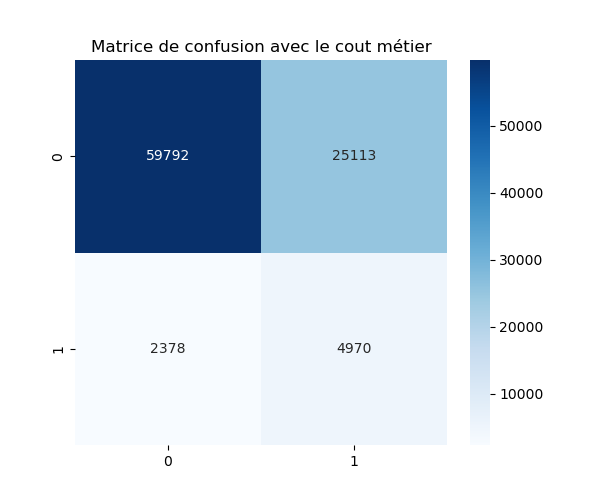

In [142]:
cm_metier

## Interprétabilité des modèles  
L'interprétabilité global explique le comportement du modèle dans son ensemble.  
L'interprétabilité locale explique le résultat d'une prédiction en particulier.
### Lime

In [7]:
from lime import lime_tabular
import random

#### regression logistic

In [8]:
log_reg_metier.__dict__

{'_model_meta': <mlflow.models.model.Model at 0x1e3be6713d0>,
 '_model_impl': LogisticRegression(C=36.896172428492385),
 '_predict_fn': <bound method LinearClassifierMixin.predict of LogisticRegression(C=36.896172428492385)>}

In [9]:
from sklearn.model_selection import train_test_split
from lime import lime_tabular
import random

In [29]:
explainer = lime_tabular.LimeTabularExplainer(X_train.to_numpy(),
                                              mode="classification",
                                              class_names=y_train.unique(),
                                              feature_names = np.array(X_train.columns.tolist()))


In [125]:
idx = random.randint(1, len(X_test))

explanation = explainer.explain_instance(np.array(X_test)[idx], log_reg_metier._model_impl.predict_proba,
                                         num_features=10)

C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [127]:
print(f"Valeur réelle : {y_test.iloc[idx]}")
explanation.show_in_notebook()

Valeur réelle : 0


In [ ]:
explanation.local_exp[1]

[(55, -0.158202523663018),
 (11, 0.15522543308554482),
 (15, 0.14618883521551418),
 (103, 0.12577845126297163),
 (5, 0.12509389249916086),
 (2, 0.10879410957689384),
 (50, 0.0918143084956673),
 (104, -0.07961164032678834),
 (101, 0.07726949456549949),
 (36, -0.07281276649621163)]

In [130]:
X_test.columns.tolist()[55]

'ORGANIZATION_TYPE_Transport: type 3'

On va regarder pour dix lignes aléatoires

#### Interprétabilité pour les acceptés
On ne va regarder les variables importante uniquement pour les demandes qui ont été acceptées

In [208]:
i=0
accepted_explanations = []
accepted_local_importance = {}
while i < 10:
    idx = random.randint(1, len(X_test))
    if y_test.iloc[idx] == 0:
        i +=1
        pass
    else :
        continue
    explanation = explainer.explain_instance(np.array(X_test)[idx], log_reg._model_impl.predict_proba,
                                         num_features=10)
    
    idx_importance = {}
    for feature in explanation.local_exp[1]:
        #print(X_test.columns.tolist()[feature[0]])
        idx_importance[X_test.columns.tolist()[feature[0]]] = feature[1]
    accepted_local_importance[idx] = idx_importance
                                                                            
        
    print(f"Valeur réelle : {y_test.iloc[idx]}")
    #explanation.show_in_notebook()
    accepted_explanations.append(explanation)

C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0
Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0
Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0
Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 0


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [209]:
accepted_local_importance_df = pd.DataFrame(accepted_local_importance).fillna(0)

In [210]:
accepted_local_importance_df['MEAN'] = [accepted_local_importance_df.iloc[i].mean() for i in range(accepted_local_importance_df.shape[0])]

In [211]:
accepted_local_importance_df.head()

,28769,21359,84693,90061,56695,8579,5953,81215,7584,41628,MEAN
AMT_GOODS_PRICE,-0.247485,-0.245415,0.00000,0.000000,-0.238350,-0.259735,0.096457,0.000000,0.000000,0.000000,-0.089453
BURO_CREDIT_TYPE_Consumercredit_MEAN,0.169098,-0.133613,-0.13951,0.187052,0.173233,0.000000,0.000000,0.000000,-0.135415,-0.132102,-0.001126
BURO_CREDIT_TYPE_Mortgage_MEAN,0.159301,0.154080,0.15282,0.135524,0.124236,0.133752,0.136279,0.125845,0.159493,0.172405,0.145373
FLAG_DOCUMENT_18,0.148447,0.112559,0.09786,0.154228,0.159972,0.094674,0.131085,0.106939,0.157227,0.137032,0.130002
AMT_CREDIT,0.144089,0.158137,0.00000,0.000000,0.151072,0.132826,0.000000,0.000000,-0.099086,0.000000,0.048704


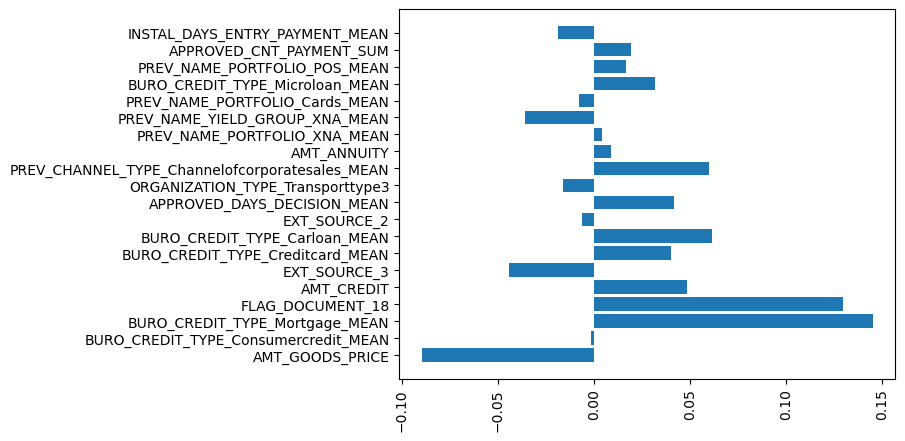

In [212]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
fig = plt.figure()
t = Affine2D().rotate_deg(90)


plt.barh(accepted_local_importance_df.index.tolist(), accepted_local_importance_df['MEAN'])
plt.xticks(rotation=90)
plt.show()

#### Interprétabilité pour les rejetés

In [213]:
i=0
rejected_explanations = []
rejected_local_importance = {}
while i < 10:
    idx = random.randint(1, len(X_test))
    if y_test.iloc[idx] == 1:
        i +=1
        pass
    else :
        continue
    explanation = explainer.explain_instance(np.array(X_test)[idx], log_reg._model_impl.predict_proba,
                                         num_features=10)
    
    idx_importance = {}
    for feature in explanation.local_exp[1]:
        #print(X_test.columns.tolist()[feature[0]])
        idx_importance[X_test.columns.tolist()[feature[0]]] = feature[1]
    rejected_local_importance[idx] = idx_importance
                                                                            
        
    print(f"Valeur réelle : {y_test.iloc[idx]}")
    #explanation.show_in_notebook()
    rejected_explanations.append(explanation)

C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1
Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1
Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1
Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valeur réelle : 1
Valeur réelle : 1


C:\Users\matth\miniconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [214]:
rejected_local_importance_df = pd.DataFrame(rejected_local_importance).fillna(0)

In [215]:
rejected_local_importance_df['MEAN'] = [rejected_local_importance_df.iloc[i].mean() for i in range(rejected_local_importance_df.shape[0])]

In [216]:
rejected_local_importance_df.head()

,83911,19873,12257,21696,49253,55596,38313,35210,956,37516,MEAN
BURO_CREDIT_TYPE_Mortgage_MEAN,0.136907,0.149613,0.161915,0.157710,0.113354,0.151627,0.171318,0.099913,0.147387,0.129338,0.141908
ORGANIZATION_TYPE_Transporttype3,-0.128610,0.000000,0.000000,0.000000,0.000000,-0.103475,0.000000,0.000000,0.000000,-0.148333,-0.038042
BURO_CREDIT_TYPE_Consumercredit_MEAN,-0.128164,-0.130894,0.000000,-0.125919,-0.120774,0.000000,0.000000,0.000000,-0.119308,0.156114,-0.046895
BURO_CREDIT_TYPE_Creditcard_MEAN,0.116540,0.102267,0.000000,0.116606,0.126940,0.000000,0.000000,0.000000,0.122970,-0.174380,0.041094
BURO_CREDIT_TYPE_Carloan_MEAN,0.116484,0.105167,0.125944,0.103923,0.127354,0.127013,0.121706,0.123429,0.111039,0.000000,0.106206


bizarre qu'il n'y est aucune valeur négative (presque)

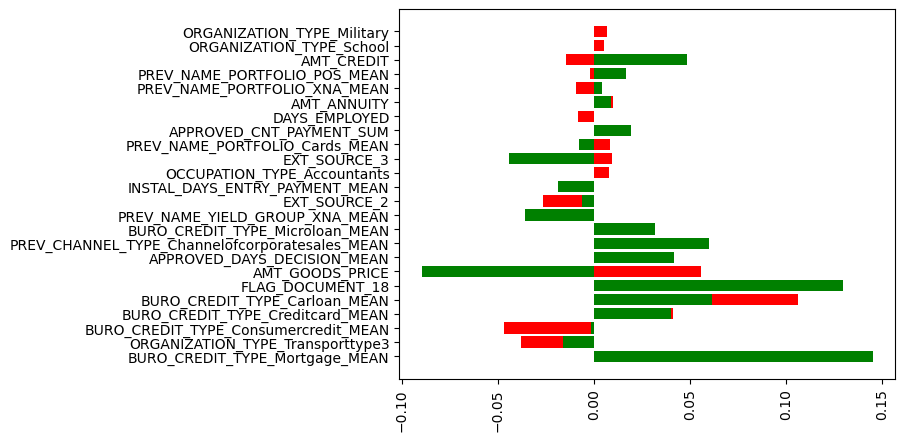

In [227]:
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
fig = plt.figure()
t = Affine2D().rotate_deg(90)


plt.barh(rejected_local_importance_df.index.tolist(), rejected_local_importance_df['MEAN'] , color='r')

plt.xticks(rotation=90)
plt.show()

In [222]:
set_accepted = set(accepted_local_importance_df.index.tolist())
set_rejected = set(rejected_local_importance_df.index.tolist())

In [219]:
set_accepted - set_rejected

set()

In [220]:
set_rejected - set_accepted

{'DAYS_EMPLOYED',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_School'}

<BarContainer object of 20 artists>

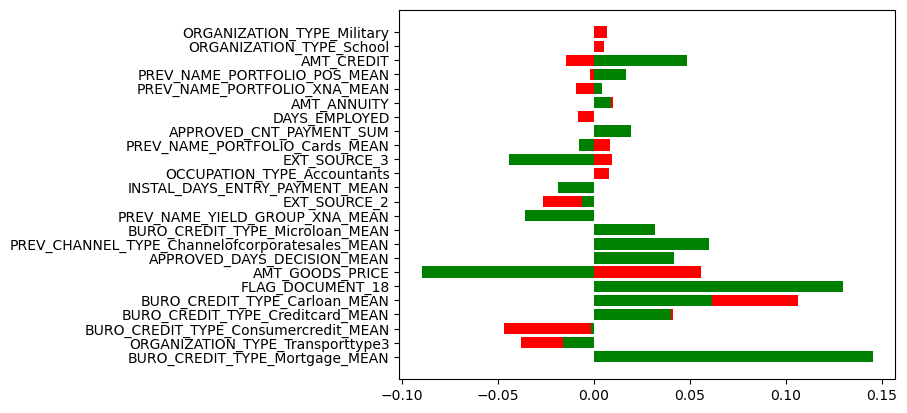

In [229]:
fig = plt.figure()
plt.barh(rejected_local_importance_df.index.tolist(), rejected_local_importance_df['MEAN'], color='r')
plt.barh(accepted_local_importance_df.index.tolist(), accepted_local_importance_df['MEAN'], color='g')

###Pour les erreurs de predictions

In [ ]:
preds = lr.predict(X_test)

false_preds = np.argwhere((preds != Y_test)).flatten()

idx  = random.choice(false_preds)


explanation = explainer.explain_instance(X_test[idx], lr.predict_proba)

explanation.show_in_notebook()

#### Global

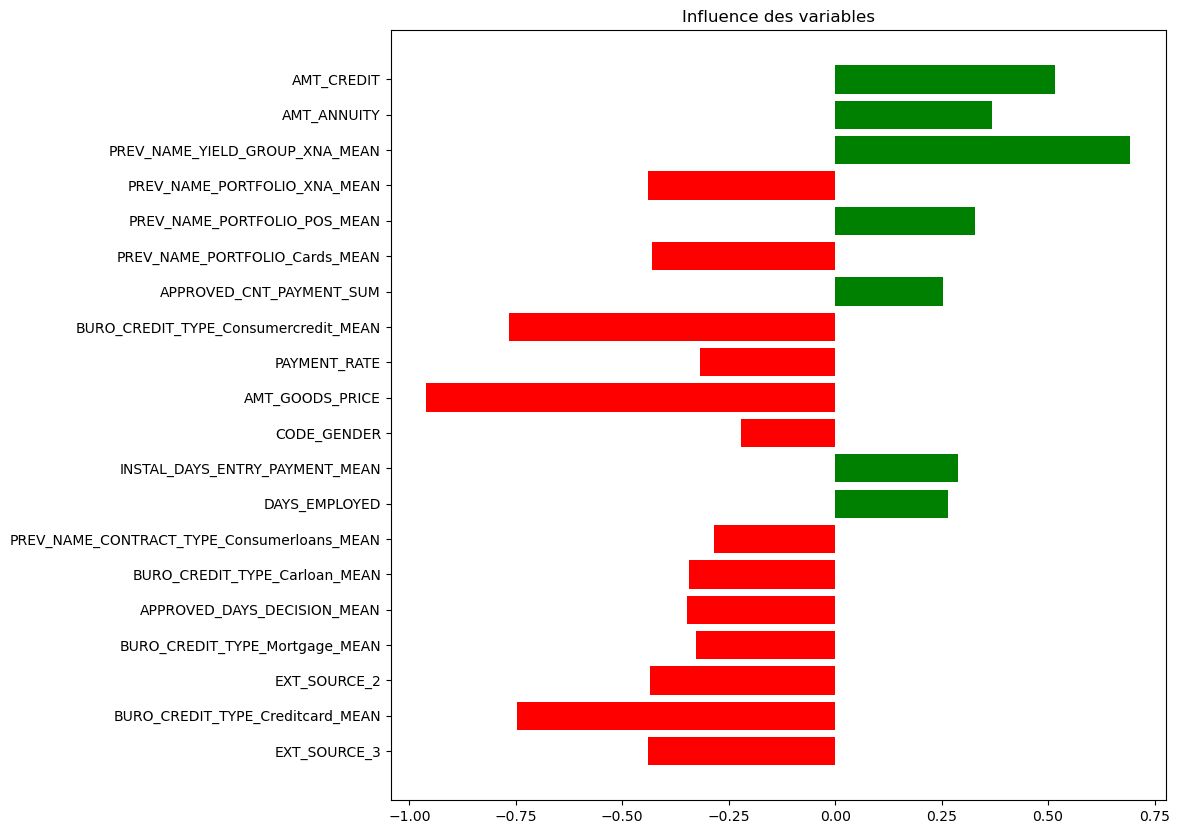

In [ ]:
fig = plt.figure(figsize=(10,10))
to_print = [ i for i in zip(log_reg_metier._model_impl.coef_[0],log_reg_metier._model_impl.feature_names_in_)  if abs(i[0])>=0.2]
coefs = [i[0] for i in to_print]
features_names = [i[1] for i in to_print]
#plt.barh(range(len(log_reg._model_impl.coef_[0])), log_reg._model_impl.coef_[0], color=["red" if coef<0 else "green" for coef in log_reg._model_impl.coef_[0]])
plt.barh(range(len(to_print)), coefs, color=["red" if coef<0 else "green" for coef in coefs])
plt.yticks(range(len(to_print)), features_names, fontsize=10);
plt.title("Influence des variables")
plt.savefig("interprétabilité globale.png", bbox_inches="tight")

In [268]:
features_importance = [(f, c) for f, c in zip(tuple(log_reg_metier._model_impl.feature_names_in_), tuple(log_reg_metier._model_impl.coef_[0]))]
features_importance.sort(key=lambda x: abs(x[1]), reverse=True)


In [269]:
features_importance

[('AMT_GOODS_PRICE', -0.9576591330435661),
 ('BURO_CREDIT_TYPE_Consumercredit_MEAN', -0.7729858706502618),
 ('BURO_CREDIT_TYPE_Creditcard_MEAN', -0.7537845192024092),
 ('PREV_NAME_YIELD_GROUP_XNA_MEAN', 0.6943029258596604),
 ('AMT_CREDIT', 0.5142425817372985),
 ('EXT_SOURCE_3', -0.4399181657447837),
 ('PREV_NAME_PORTFOLIO_XNA_MEAN', -0.4392407362945318),
 ('EXT_SOURCE_2', -0.434472718726539),
 ('PREV_NAME_PORTFOLIO_Cards_MEAN', -0.4296359836044369),
 ('AMT_ANNUITY', 0.3677670511841517),
 ('APPROVED_DAYS_DECISION_MEAN', -0.3498727746073192),
 ('BURO_CREDIT_TYPE_Carloan_MEAN', -0.34585580167323593),
 ('PREV_NAME_PORTFOLIO_POS_MEAN', 0.33463176236651315),
 ('BURO_CREDIT_TYPE_Mortgage_MEAN', -0.3285078476264045),
 ('PAYMENT_RATE', -0.3162575223263718),
 ('PREV_NAME_CONTRACT_TYPE_Consumerloans_MEAN', -0.2907649781183621),
 ('INSTAL_DAYS_ENTRY_PAYMENT_MEAN', 0.28758261583903755),
 ('DAYS_EMPLOYED', 0.26528551802610556),
 ('APPROVED_CNT_PAYMENT_SUM', 0.2542593612313389),
 ('CODE_GENDER', -0.2

### Shap

In [20]:
import mlflow
import shap

In [21]:
import pickle

In [22]:
mlflow.set_tracking_uri("http://localhost:5000")
logged_reg_metier = 'runs:/e0165fc14d104761884480245d5bfd00/log_reg_metier'


In [23]:
log_reg_metier = mlflow.pyfunc.load_model(logged_reg_metier)

2023/02/22 09:43:13 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - cloudpickle (current: 2.0.0, required: cloudpickle==2.2.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [24]:
log_reg_metier.__dict__

{'_model_meta': <mlflow.models.model.Model at 0x2271f98ca30>,
 '_model_impl': LogisticRegression(C=36.896172428492385),
 '_predict_fn': <bound method LinearClassifierMixin.predict of LogisticRegression(C=36.896172428492385)>}

In [25]:
X_test.index

Int64Index([103618, 237782, 399102, 230545, 198273, 221551, 319450, 175011,
            250062, 252453,
            ...
            436940, 275563, 221063, 276604, 286376, 185045, 337845, 327943,
            165821, 362929],
           dtype='int64', name='SK_ID_CURR', length=92253)

In [31]:
X_test.head()

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
268461,-1.385722,0.815887,1.182091,-0.436194,-0.262469,-0.08419,-0.113985,1.098967,0.639051,-0.555419,...,-0.498997,0.468701,-0.467668,-0.324373,-1.035764,-0.567262,-0.206512,0.560991,-1.329807,1.392932
170401,1.304048,-0.456900,-1.520600,-0.436194,-0.262469,-0.08419,-0.377700,-0.432725,0.639051,-0.649218,...,-0.498997,0.468701,-0.467668,-0.324373,-0.033174,-0.567262,-0.721605,-0.857884,0.751989,-0.717910
215647,-1.497903,0.162478,0.702455,-0.436194,-0.262469,-0.08419,-1.006773,-0.432725,0.639051,2.027181,...,-0.498997,0.468701,2.138269,-0.324373,0.763334,-0.567262,-1.121819,-0.781702,0.751989,-0.717910
303306,0.112048,-0.142447,-0.251855,-0.436194,-0.262469,-0.08419,-0.114772,-0.432725,0.639051,-0.546574,...,2.004021,0.468701,-0.467668,-0.324373,0.189087,1.762853,-0.853871,-0.236101,-1.329807,1.392932
139576,-0.021781,0.067189,0.852065,-0.436194,-0.262469,-0.08419,0.123996,3.821976,-1.564821,0.977935,...,-0.498997,0.468701,-0.467668,-0.324373,0.183410,1.762853,0.313549,1.190512,0.751989,1.392932


In [26]:
shap.initjs()
log_reg_explainer = shap.LinearExplainer(log_reg_metier._model_impl, X_train)
sample_idx = 0
shap_values = log_reg_explainer.shap_values(X_test.loc[298022])

#### Bar plot

In [27]:
log_reg_explainer.shap_values(X_test.loc[298022])

array([-8.50036546e-01, -8.46716787e-01, -6.66752030e-01, -3.33892315e-01,
       -1.20029943e-02,  8.18200095e-03,  3.01360808e-02, -2.04443164e-02,
        6.49692112e-02, -1.42135623e-04, -2.49390817e-01,  7.43137230e-02,
        5.05055862e-02,  3.35060366e-02, -4.26548742e-03,  7.90550380e-02,
        1.27032892e-02, -1.66518639e-04, -3.33049406e-02, -3.11504629e-03,
       -3.74411267e-03, -2.76217240e-01,  1.93605730e-03,  5.43060723e-04,
       -6.20557911e-03,  8.70711259e-02, -3.15093884e-02,  6.41498622e-02,
       -2.20975314e-02, -2.08810000e-02,  8.02017739e-03, -7.65405261e-03,
       -2.22528363e-01,  3.84163291e-03, -3.61264563e-03,  1.23127047e-01,
        2.07781081e-01,  4.85465661e-02, -1.72003325e-02, -5.53066531e-02,
        8.44092374e-03, -2.41611124e-01,  1.96441033e-01,  4.85465661e-02,
        1.11019305e-04,  1.53990828e-03,  4.69422584e-02, -1.93736990e-01,
        1.87248987e-01,  5.82820834e-03,  8.32031056e-01,  9.76450203e-02,
       -3.92175645e-03,  

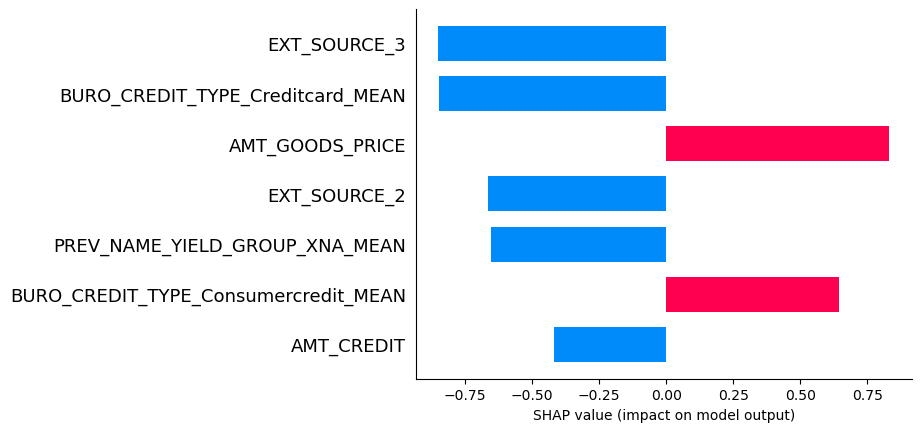

In [28]:
shap.bar_plot(shap_values,
              feature_names=X_test.columns)

#### Waterfall plot

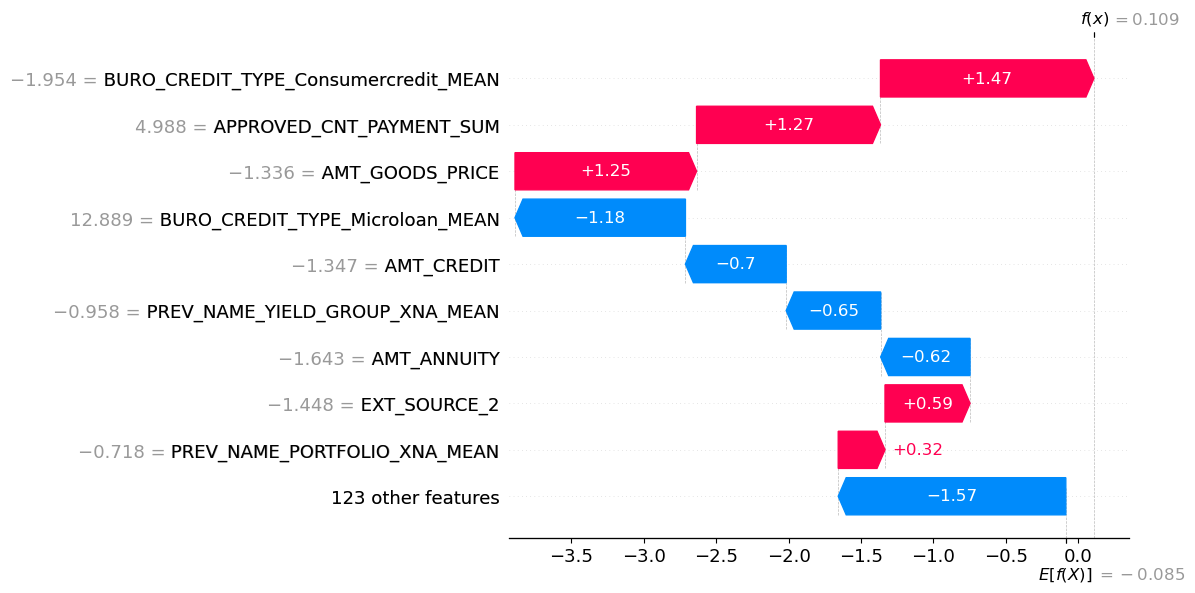

In [80]:
shap_values = log_reg_explainer(X_test[:1])
shap_values.feature_names = X_test.columns.tolist()

shap.waterfall_plot(shap_values[0])

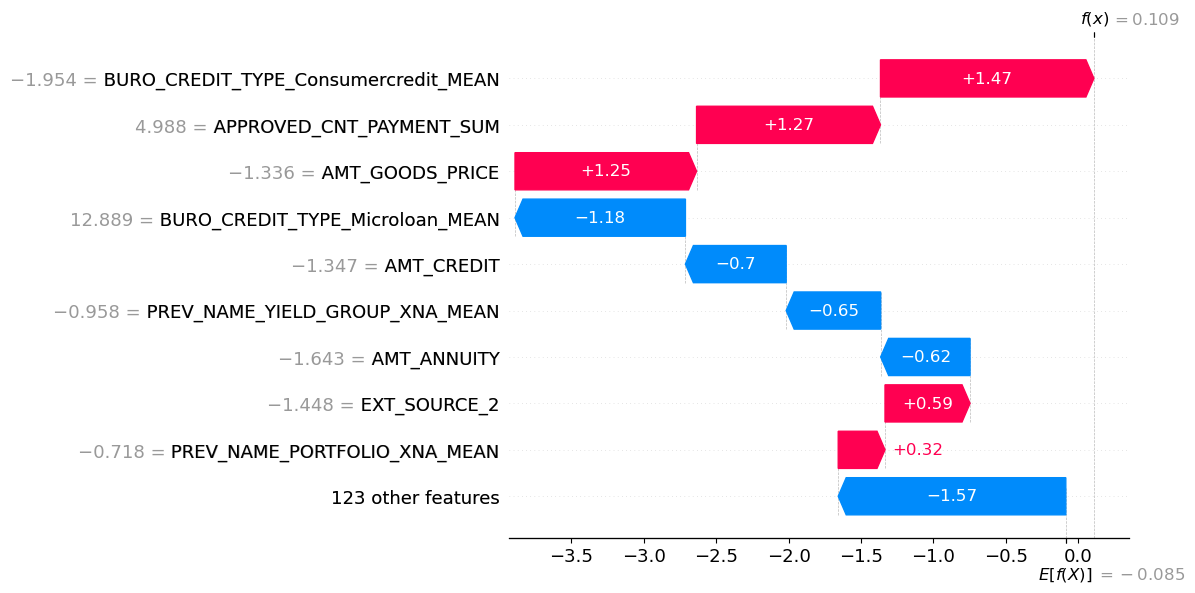

In [83]:
shap.waterfall_plot(shap_values[0])

#### Decision plot

In [32]:
X_test.index

Int64Index([103618, 237782, 399102, 230545, 198273, 221551, 319450, 175011,
            250062, 252453,
            ...
            436940, 275563, 221063, 276604, 286376, 185045, 337845, 327943,
            165821, 362929],
           dtype='int64', name='SK_ID_CURR', length=92253)

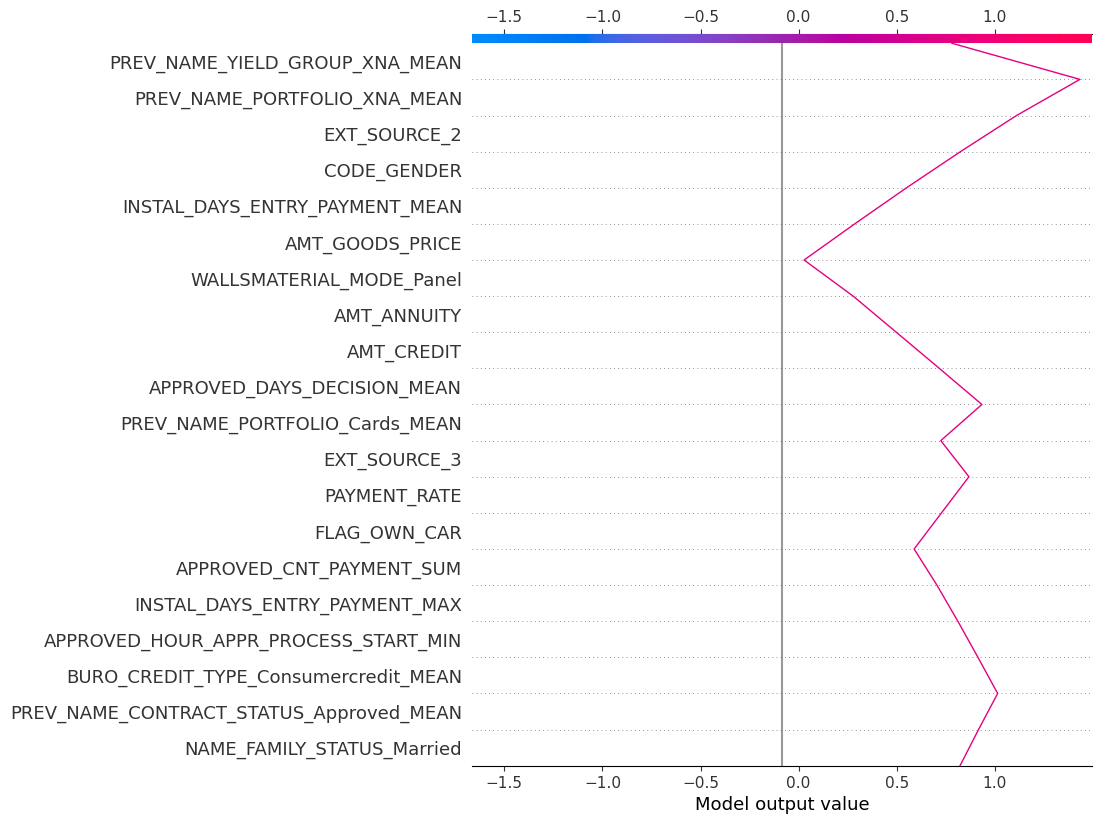

In [33]:
shap.decision_plot(log_reg_explainer.expected_value,
                   log_reg_explainer.shap_values(X_test.loc[275563]),
                  feature_names=X_test.columns.tolist())

In [36]:
log_reg_explainer.shap_values(X_test.loc[275563]) == log_reg_explainer.shap_values(X_test.loc[185045])

array([False, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,

### Enregistrement des shape values pour chaque client de la bdd de l'api

In [41]:
pd.DataFrame(X_test.loc[297172]).T

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR
297172,-0.604319,0.416581,-1.159545,-0.436194,-0.262469,-0.08419,-1.006773,-0.432725,0.639051,-1.097807,...,-0.498997,0.468701,2.138269,-0.324373,-0.870274,-0.567262,-0.35896,0.188753,-1.329807,-0.71791


In [42]:
import json

In [43]:
to_api = X_test.sample(frac=0.004)
to_api.to_csv("../datascientist_P7_api/api_data_sample.csv")

In [44]:
X_test.loc[297172]


EXT_SOURCE_3                                   -0.604319
BURO_CREDIT_TYPE_Creditcard_MEAN                0.416581
EXT_SOURCE_2                                   -1.159545
PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN     -0.436194
PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN   -0.262469
                                                  ...   
NAME_EDUCATION_TYPE_Highereducation            -0.567262
AMT_ANNUITY                                    -0.358960
AMT_CREDIT                                      0.188753
NAME_FAMILY_STATUS_Married                     -1.329807
FLAG_OWN_CAR                                   -0.717910
Name: 297172, Length: 132, dtype: float64

In [45]:
to_api.index

Int64Index([301366, 398358, 408475, 113377, 148220, 417562, 340905, 271035,
            440224, 322296,
            ...
            368027, 192707, 359241, 410973, 404313, 378013, 440403, 199875,
            280438, 401627],
           dtype='int64', name='SK_ID_CURR', length=369)

In [46]:
X_test.head()

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
103618,0.436543,-0.049275,-1.448042,-0.436194,-0.262469,12.888656,-0.211565,-0.432725,0.639051,0.658136,...,-0.498997,-2.133558,-0.467668,-0.324373,-2.225132,1.762853,-1.642501,-1.346980,0.751989,1.392932
237782,0.822437,-0.013440,-0.349136,-0.436194,-0.262469,-0.084190,-0.176595,-0.432725,0.639051,-0.564908,...,-0.498997,0.468701,2.138269,-0.324373,0.581096,-0.567262,-0.016806,-0.257925,0.751989,-0.717910
399102,0.112048,-0.980989,1.132244,-0.436194,-0.262469,-0.084190,-0.152792,-0.432725,-1.564821,-0.251228,...,-0.498997,-2.133558,-0.467668,-0.324373,-1.837665,-0.567262,1.091622,1.088469,0.751989,-0.717910
230545,0.112048,-0.142447,0.025571,-0.436194,-0.262469,-0.084190,-0.160299,-0.432725,0.639051,0.314860,...,-0.498997,0.468701,2.138269,-0.324373,0.355996,-0.567262,0.279085,-0.016071,-1.329807,-0.717910
198273,1.288251,-0.980989,0.784790,1.491126,-0.262469,-0.084190,-1.006773,0.418215,0.639051,3.140954,...,-0.498997,0.468701,-0.467668,-0.324373,1.085230,1.762853,0.134710,-0.820810,-1.329807,-0.717910


In [65]:
shap_explainers = {"feature_names": to_api.columns.tolist()}
shap_explainers["expected_value"] = log_reg_explainer.expected_value
for client in to_api.index:
    shap_explainers[client] = log_reg_explainer(pd.DataFrame(X_test.loc[client]).T)[0].values.tolist()

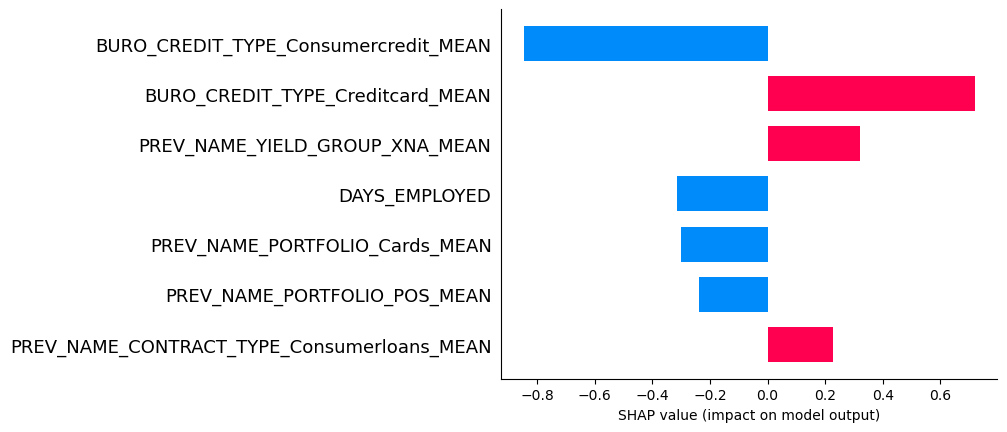

In [66]:
shap.bar_plot(np.array(shap_explainers[417562]),
              feature_names=shap_explainers["feature_names"])

In [67]:
shap_explainers[340905] == shap_explainers[417562]

False

In [69]:
type(shap_explainers[417562])

list

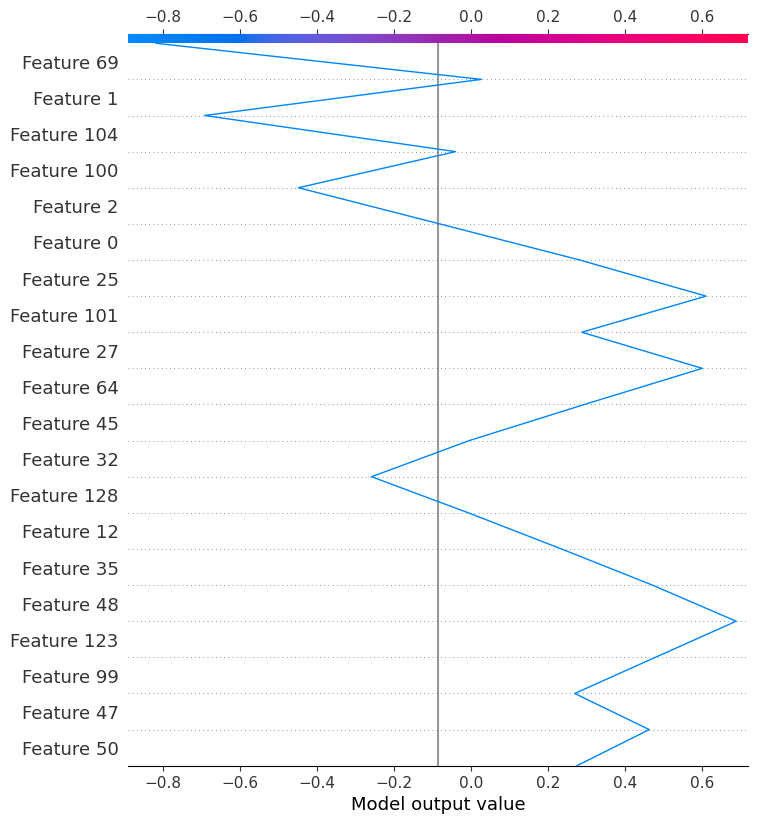

In [73]:
shap.decision_plot(shap_explainers["expected_value"], np.array(shap_explainers[340905]))

In [75]:
with open("../datascientist_P7_api/client_interpretability.json", "w") as f:
    json.dump(shap_explainers, f)

In [82]:
to_api

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
297172,-0.604319,0.416581,-1.159545,-0.436194,-0.262469,-0.08419,-1.006773,-0.432725,0.639051,-1.097807,...,-0.498997,0.468701,2.138269,-0.324373,-0.870274,-0.567262,-0.358960,0.188753,-1.329807,-0.717910
428560,0.132573,0.815887,-0.192353,-0.436194,-0.262469,-0.08419,0.284372,-0.432725,0.639051,-0.928186,...,-0.498997,0.468701,-0.467668,-0.324373,0.790300,-0.567262,-0.182605,-0.224931,0.751989,-0.717910
403057,-0.820469,1.115366,0.848958,-0.436194,4.653039,-0.08419,-0.152792,3.943539,0.639051,-0.250036,...,-0.498997,0.468701,-0.467668,-0.324373,0.537382,-0.567262,-0.305556,-0.873939,0.751989,-0.717910
242697,0.275489,-0.980989,0.528300,1.298394,-0.262469,-0.08419,1.762128,-0.432725,0.639051,0.686020,...,-0.498997,0.468701,2.138269,-0.324373,-0.506651,-0.567262,-0.822202,-0.604963,0.751989,-0.717910
325883,0.700183,0.067189,0.669077,-0.436194,0.597745,-0.08419,0.313685,0.333121,0.639051,-0.375395,...,-0.498997,0.468701,2.138269,-0.324373,-0.613098,-0.567262,-0.755137,-0.707911,0.751989,-0.717910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317034,0.112048,-0.980989,0.050785,-0.436194,-0.262469,-0.08419,2.133936,-0.432725,0.639051,2.284090,...,-0.498997,0.468701,-0.467668,3.082869,0.046590,1.762853,-0.938944,-0.817479,0.751989,-0.717910
148764,1.223968,0.591278,0.411276,-0.436194,-0.262469,-0.08419,-0.176585,-0.432725,0.639051,-0.372661,...,-0.498997,-2.133558,-0.467668,-0.324373,-0.434835,-0.567262,-0.322323,0.188753,-1.329807,-0.717910
222508,0.652286,-0.980989,-1.089171,-0.436194,-0.262469,-0.08419,-1.006773,-0.432725,-1.564821,-0.771354,...,-0.498997,0.468701,2.138269,3.082869,1.270306,-0.567262,-1.404670,-1.152889,0.751989,-0.717910


In [76]:
dashboard_df = new_df.loc[to_api.index]

In [84]:
a = set(dashboard_df.index)
b = set(to_api.index)
a == b

True

In [18]:
dashboard_df.head()

,EXT_SOURCE_3,BURO_CREDIT_TYPE_Creditcard_MEAN,EXT_SOURCE_2,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashStreethigh_MEAN,BURO_CREDIT_TYPE_Microloan_MEAN,APPROVED_RATE_DOWN_PAYMENT_MAX,PREV_CODE_REJECT_REASON_HC_MEAN,FLAG_DOCUMENT_3,APPROVED_AMT_ANNUITY_MEAN,...,FLAG_EMP_PHONE,OCCUPATION_TYPE_Laborers,NAME_CONTRACT_TYPE_Revolvingloans,DAYS_REGISTRATION,NAME_EDUCATION_TYPE_Highereducation,AMT_ANNUITY,AMT_CREDIT,NAME_FAMILY_STATUS_Married,FLAG_OWN_CAR,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
402569,0.171468,0.363636,0.743303,0.0,0.0,0.0,0.057478,0.0,0,29879.9100,...,1,1,0,-442.0,0,19228.5,397017.0,1,1,0
326005,0.832785,0.250000,0.352526,0.0,0.0,0.0,0.108915,0.0,1,9353.8575,...,1,0,0,-6625.0,0,20619.0,700830.0,0,1,1
167611,0.535276,0.200000,0.545215,0.0,0.0,0.0,0.217834,0.0,1,15252.5400,...,1,0,0,-8378.0,0,17806.5,562981.5,1,1,0
203697,0.670652,0.000000,0.443444,0.0,0.0,0.0,0.000000,0.0,1,7533.2700,...,1,0,0,-1638.0,1,27805.5,454500.0,1,0,0
421434,0.517297,0.307692,0.761713,0.0,0.0,0.0,0.220732,0.0,1,4431.3975,...,1,0,0,-1945.0,1,91147.5,935640.0,1,1,0


In [77]:
dashboard_df.shape, to_api.shape

((369, 133), (369, 132))

In [78]:
dashboard_df.to_csv("../datascientist_P7_dashboard/client_info.csv")